In [1]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

%matplotlib inline

In [3]:
# !pip install -U protobuf==3.19.0

In [5]:
# !pip show protobuf 4.24.4

In [2]:
# Load the file with classes
with open('./train_dataset_dataset/classes.txt', 'r') as f:
    classes = [i.strip() for i in f.read().split(',')]

In [3]:
classes

['wood', 'glass', 'plastic', 'metal']

In [4]:
# Load the meta info into a dataframe
info_path = './train_dataset_dataset/video0/video0.txt'

data = pd.read_csv(info_path, sep=',', header=None)
data.columns = ['frame_number', 'object_id', 'label', 'x', 'y', 'w', 'h']


In [5]:
len(data[data['frame_number']==0]['object_id'].unique())

17

In [22]:
data.to_csv('video0_labels.csv', index=False)

In [6]:
data[data['frame_number']==0]

,frame_number,object_id,label,x,y,w,h
0,0,8,0,0.4906,0.3667,0.3188,0.7278
1,0,23,2,0.1016,0.2250,0.1250,0.4444
2,0,28,2,0.0430,0.4972,0.0859,0.3278
3,0,34,2,0.7234,0.1694,0.2469,0.3333
4,0,43,2,0.3438,0.7667,0.1219,0.3889
5,0,49,0,0.2547,0.4694,0.2500,0.3333
6,0,73,1,0.0086,0.7472,0.0172,0.2444
7,0,86,1,0.1734,0.2056,0.0875,0.1556
8,0,99,1,0.1797,0.3361,0.1312,0.2333
9,0,150,3,0.4203,0.2167,0.0812,0.1444


In [7]:
data['label'].unique()

array([0, 2, 1, 3])

In [8]:
df = data[data['frame_number']==0]
df

,frame_number,object_id,label,x,y,w,h
0,0,8,0,0.4906,0.3667,0.3188,0.7278
1,0,23,2,0.1016,0.2250,0.1250,0.4444
2,0,28,2,0.0430,0.4972,0.0859,0.3278
3,0,34,2,0.7234,0.1694,0.2469,0.3333
4,0,43,2,0.3438,0.7667,0.1219,0.3889
5,0,49,0,0.2547,0.4694,0.2500,0.3333
6,0,73,1,0.0086,0.7472,0.0172,0.2444
7,0,86,1,0.1734,0.2056,0.0875,0.1556
8,0,99,1,0.1797,0.3361,0.1312,0.2333
9,0,150,3,0.4203,0.2167,0.0812,0.1444


In [9]:
# Load the image
img_path = './train_dataset_dataset/video0/frames_rgb/0000.png'
img = cv2.imread(img_path)

In [20]:
def cut(df):
    
#     img = 
    
    for index, row in df.iterrows():
        try:
            # Load the YOLO format bounding box coordinates
            x, y, w, h = row['x'], row['y'], row['w'], row['h']

            # Convert the YOLO format coordinates to OpenCV format coordinates
            dw, dh, _ = img.shape
            nx = int(x * dw)
            ny = int(y * dh)
            nw = int(w * dw)
            nh = int(h * dh)

            # Crop the image using the OpenCV format coordinates
            crop_img = img[ny:ny+nh, nx:nx+nw]

            cv2.imwrite('frame0/{}.jpg'.format(int(row['object_id'])), crop_img)
            plt.title('obj_id: {}'.format(int(row['object_id'])))
            plt.imshow(crop_img)
            plt.show()
        except:
            pass

# Display the cropped image
# cv2.imshow("Cropped Image", crop_img)

# Save the cropped image
# cv2.imwrite("Cropped Image.jpg", crop_img)

# Wait for a key press and then close the window
# cv2.waitKey(0)
# cv2.destroyAllWindows()

LABEL: 0 WOOD


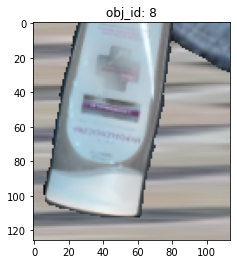

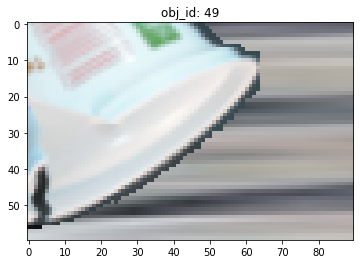

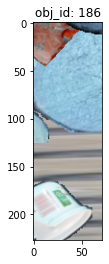


LABEL: 2 PLASTIC


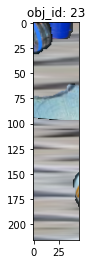

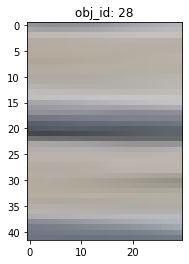

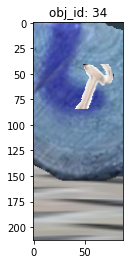

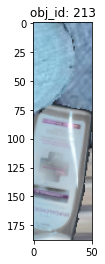

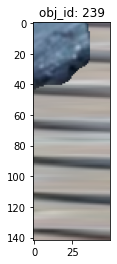


LABEL: 1 GLASS


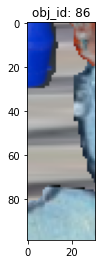

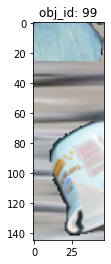

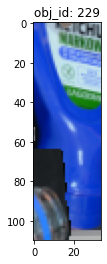


LABEL: 3 METAL


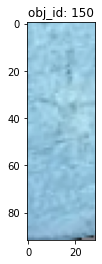

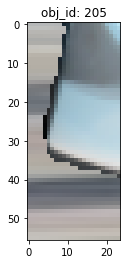

In [21]:
for label in df['label'].unique():
    print('LABEL:', label, classes[label].upper())
    cut(df[df['label']==label])
    print("================================================================")
    print()
